In [4]:
import pandas as pd
import datetime
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#df=pd.read_excel("computeContourAndPlanningTime.xlsx")
df = pd.read_excel('master_processed_1.xlsx')
df.head()

,MRN,CreatedDate,CreatedTime,ActivatedDate,ActivatedTime,SiteGroup,Diagnosis,Category_x,PlanCreateDate,PlanCreateTime,...,ProgressRevWait,TimeBtw_ContourCompl_PlanReview,TimeBtw_BkTx_PlanReview,TimeBtw_Sim_PlanReview,TxBook-Sim,Tx-TxBook,Tx-PlanCompl,Tx-PlanPrompt,Tx-PlanReview,PlanWait
0,1266,2012-07-16,1999-11-30 15:17:48,2012-07-16,1999-11-30 15:21:33,LUNG,mets brain - ca lung,Urgent 2,2012-07-16,1999-11-30 15:20:47,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
1,2918,2015-12-24,1999-11-30 11:49:31,2015-12-24,1999-11-30 11:50:54,LUNG,ca lung NSCLC-right,Urgent 2,2015-12-24,1999-11-30 11:50:31,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2,2990,2014-11-18,1999-11-30 15:07:24,2014-11-18,1999-11-30 15:13:27,GENITOURINARY(GU),Ca Prostate,Standard 3,2014-11-18,1999-11-30 15:08:55,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
3,5723,2013-07-11,1999-11-30 17:02:55,2013-07-11,1999-11-30 17:05:16,LUNG,ca lung NSCLC-left,Standard 3,2013-07-11,1999-11-30 17:04:08,...,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN
4,6291,2015-04-15,1999-11-30 18:00:44,2015-04-15,1999-11-30 18:18:52,GI LOWER,Ca Anal Canal,Standard 3,2015-04-15,1999-11-30 18:14:57,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [15]:
df.shape

(57763, 82)

In [16]:
df['Category_x'].unique()

array(['Urgent 2', 'Standard 3', 'Planned Delay 3', 'Emergency 1', nan],
      dtype=object)

In [17]:
# exclude planned delays
df=df[df['Category_x']!='Planned Delay 3']
#df=df[df['Category_x']!='planned Delay 3']


## Pre-treatment steps time analysis

In [18]:
# remove outliers by total wait time
from scipy import stats
df['z_score']=stats.zscore(df['WaitTime'])
df=df.loc[df['z_score'].abs()<=3]
df.head()

,MRN,CreatedDate,CreatedTime,ActivatedDate,ActivatedTime,SiteGroup,Diagnosis,Category_x,PlanCreateDate,PlanCreateTime,...,TimeBtw_ContourCompl_PlanReview,TimeBtw_BkTx_PlanReview,TimeBtw_Sim_PlanReview,TxBook-Sim,Tx-TxBook,Tx-PlanCompl,Tx-PlanPrompt,Tx-PlanReview,PlanWait,z_score
0,1266,2012-07-16,1999-11-30 15:17:48,2012-07-16,1999-11-30 15:21:33,LUNG,mets brain - ca lung,Urgent 2,2012-07-16,1999-11-30 15:20:47,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,-0.857699
1,2918,2015-12-24,1999-11-30 11:49:31,2015-12-24,1999-11-30 11:50:54,LUNG,ca lung NSCLC-right,Urgent 2,2015-12-24,1999-11-30 11:50:31,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,-0.938253
2,2990,2014-11-18,1999-11-30 15:07:24,2014-11-18,1999-11-30 15:13:27,GENITOURINARY(GU),Ca Prostate,Standard 3,2014-11-18,1999-11-30 15:08:55,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,-0.938253
3,5723,2013-07-11,1999-11-30 17:02:55,2013-07-11,1999-11-30 17:05:16,LUNG,ca lung NSCLC-left,Standard 3,2013-07-11,1999-11-30 17:04:08,...,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,1.156146
4,6291,2015-04-15,1999-11-30 18:00:44,2015-04-15,1999-11-30 18:18:52,GI LOWER,Ca Anal Canal,Standard 3,2015-04-15,1999-11-30 18:14:57,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.108946


In [19]:
# select pre-treatment steps wait time and durations
preTxDur = df[['MRN','CreatedDate','SiteGroup','Diagnosis','Category_x','PlanCreateDate','Team',
               'GTV/CTVPromtDate','GTV/CTVCompleteDate','ReviewDatePlaner','Location_x','FinalPlanPromtDate','FinalPlanCompleteDate',
               'PlanReviewRequestDate','PlanProgressReviewDate','eBookingReviDate',
               'SimApptDt','SimApptCreatedDt','SimLocation','CTWait',
               'TxStartDt','TxApptCreatedDt','Sitegroup_y','TltDose','TxFracs','TxUnit','Intent','TotalWaitTime', 
               'ContourDur','TimeBtw_Sim_ContourCompl','TimeBtw_Sim_BkTx','Tx-TxBook','PlanDur']] 
                    # 'PlanFinish_TxStart','preTx_Dur']]

preTxDur.head()

,MRN,CreatedDate,SiteGroup,Diagnosis,Category_x,PlanCreateDate,Team,GTV/CTVPromtDate,GTV/CTVCompleteDate,ReviewDatePlaner,...,TltDose,TxFracs,TxUnit,Intent,TotalWaitTime,ContourDur,TimeBtw_Sim_ContourCompl,TimeBtw_Sim_BkTx,Tx-TxBook,PlanDur
0,1266,2012-07-16,LUNG,mets brain - ca lung,Urgent 2,2012-07-16,4.0,NaT,NaT,NaT,...,2000.0,5.0,WV15,Deferred RT-Pal,2,NaN,NaN,-1,2,NaN
1,2918,2015-12-24,LUNG,ca lung NSCLC-right,Urgent 2,2015-12-24,2.0,2015-12-24,2015-12-24,NaT,...,2000.0,5.0,WA14,Palliative,1,0.0,0.0,0,1,NaN
2,2990,2014-11-18,GENITOURINARY(GU),Ca Prostate,Standard 3,2014-11-18,4.0,2014-11-18,2014-11-18,NaT,...,800.0,1.0,OLD-WV16,Palliative,1,0.0,0.0,0,1,NaN
3,5723,2013-07-11,LUNG,ca lung NSCLC-left,Standard 3,2013-07-11,2.0,2013-07-22,2013-08-08,2013-07-31,...,6600.0,33.0,NA10,Curative,27,13.0,20.0,12,7,NaN
4,6291,2015-04-15,GI LOWER,Ca Anal Canal,Standard 3,2015-04-15,3.0,2015-04-21,2015-04-23,2015-04-23,...,3600.0,20.0,OLD-NA11,Curative,14,2.0,2.0,7,1,NaN


In [20]:
preTxDur['ContourWait']=pd.to_datetime(preTxDur['GTV/CTVPromtDate']).dt.date-pd.to_datetime(preTxDur['SimApptDt']).dt.date
preTxDur['TxApptBook-Sim']=pd.to_datetime(preTxDur['TxApptCreatedDt']).dt.date-pd.to_datetime(preTxDur['SimApptDt']).dt.date
preTxDur['TxApptBook-Sim']=preTxDur['TxApptBook-Sim'].dt.days

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [21]:
preTxDur['TxApptBook-Sim']

0        -1
1         0
2         0
3        12
4         7
         ..
57757     1
57758     0
57759     0
57760     4
57761    -4
Name: TxApptBook-Sim, Length: 45967, dtype: int64

In [22]:
df['Category_x'].unique()

array(['Urgent 2', 'Standard 3', 'Emergency 1', nan], dtype=object)

### Wait time > 14 days:

In [24]:
df_exceed=preTxDur[(df['TotalWaitTime']>14)&(df['Category_x']!='Planned Delay 3')&(df['Category_x']!='planned Delay 3')]
df_exceed.shape

(16033, 36)

<AxesSubplot:>

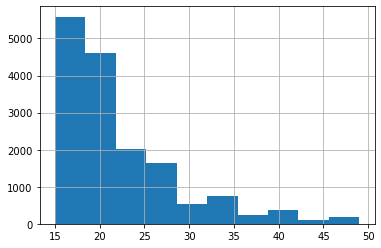

In [25]:
df_exceed['TotalWaitTime'].hist()

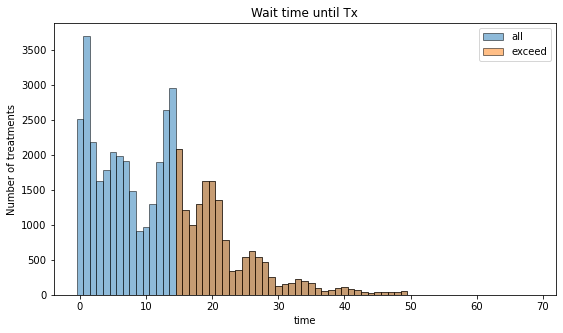

In [26]:
plt.figure(figsize=[9,5])
bins = range(0,70)

x = preTxDur['TotalWaitTime']
y = df_exceed['TotalWaitTime']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Wait time until Tx')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [27]:
preTxDur.groupby(by=['SiteGroup']).count()

,MRN,CreatedDate,Diagnosis,Category_x,PlanCreateDate,Team,GTV/CTVPromtDate,GTV/CTVCompleteDate,ReviewDatePlaner,Location_x,...,Intent,TotalWaitTime,ContourDur,TimeBtw_Sim_ContourCompl,TimeBtw_Sim_BkTx,Tx-TxBook,PlanDur,ContourWait,TxApptBook-Sim,z_score_contour
SiteGroup,,,,,,,,,,,,,,,,,,,,,
BREAST,8003,8003,7955,7997,8003,8002,6753,6065,5736,8003,...,7770,8003,5941,6065,8003,8003,4118,6753,8003,0
CNS,4033,4033,4025,4032,4033,4032,3041,2900,2665,4033,...,3910,4033,2797,2900,4033,4033,1710,3041,4033,0
ENDOCRINE,725,725,720,725,725,725,637,576,370,725,...,721,725,542,576,725,725,327,637,725,0
ENT (HEAD & NECK),4863,4863,4863,4862,4863,4863,4674,4616,2590,4863,...,4780,4863,4552,4616,4863,4863,2767,4674,4863,0
EYE,613,613,613,613,613,613,528,502,455,613,...,595,613,484,502,613,613,318,528,613,0
GENITOURINARY(GU),5214,5214,5214,5212,5214,5214,4308,3881,1337,5214,...,5136,5214,3742,3881,5214,5214,2360,4308,5214,0
GI LOWER,1926,1926,1920,1924,1926,1926,1711,1573,1149,1926,...,1903,1926,1535,1573,1926,1926,821,1711,1926,0
GI UPPER,2892,2892,2883,2889,2892,2892,2460,2261,1692,2892,...,2821,2892,2172,2261,2892,2892,1212,2460,2892,0
GYNAE,2641,2641,2623,2640,2641,2639,2422,2252,1654,2641,...,2601,2641,2199,2252,2641,2641,1405,2422,2641,0


In [ ]:
df_exceed.groupby(by=['SiteGroup']).count()

In [ ]:
df_focus = df_exceed.loc[df_exceed['SiteGroup'].isin(['Brease','Gynae','Head & Neck'])]
df_focus

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,15)

x = preTxDur['CTWait']
y = df_exceed['CTWait']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Wait time for CT after createdDate')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Contouring wait time seems to be negligible:

In [ ]:
preTxDur[preTxDur['ContourWait'].dt.days>1].groupby('SiteGroup').count()

In [ ]:
df_exceed.columns

In [ ]:
df_exceed['ContourWait']=df_exceed['ContourWait'].dt.days
y = df_exceed[(df_exceed['ContourWait']>=-20)&(df_exceed['ContourWait']<=15)].ContourWait
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')

plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Wait time for Contour after CT appt')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Contouring Time:

In [28]:
preTxDur.columns

Index(['MRN', 'CreatedDate', 'SiteGroup', 'Diagnosis', 'Category_x',
       'PlanCreateDate', 'Team', 'GTV/CTVPromtDate', 'GTV/CTVCompleteDate',
       'ReviewDatePlaner', 'Location_x', 'FinalPlanPromtDate',
       'FinalPlanCompleteDate', 'PlanReviewRequestDate',
       'PlanProgressReviewDate', 'eBookingReviDate', 'SimApptDt',
       'SimApptCreatedDt', 'SimLocation', 'CTWait', 'TxStartDt',
       'TxApptCreatedDt', 'Sitegroup_y', 'TltDose', 'TxFracs', 'TxUnit',
       'Intent', 'TotalWaitTime', 'ContourDur', 'TimeBtw_Sim_ContourCompl',
       'TimeBtw_Sim_BkTx', 'Tx-TxBook', 'PlanDur', 'ContourWait',
       'TxApptBook-Sim', 'z_score_contour'],
      dtype='object')

In [23]:
# remove outliers by contouring time
preTxDur['z_score_contour']=stats.zscore(preTxDur['ContourDur'])
preTxDur.loc[preTxDur['z_score_contour'].abs()<=3]

,MRN,CreatedDate,SiteGroup,Diagnosis,Category_x,PlanCreateDate,Team,GTV/CTVPromtDate,GTV/CTVCompleteDate,ReviewDatePlaner,...,Intent,TotalWaitTime,ContourDur,TimeBtw_Sim_ContourCompl,TimeBtw_Sim_BkTx,Tx-TxBook,PlanDur,ContourWait,TxApptBook-Sim,z_score_contour


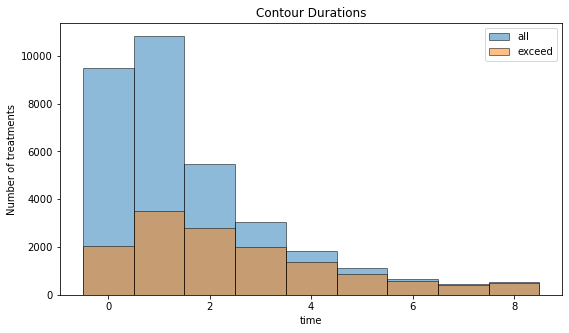

In [29]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[(preTxDur['ContourDur']>=-20)&(preTxDur['ContourDur']<=20)]['ContourDur']
y = df_exceed[(df_exceed['ContourDur']>=-20)&(df_exceed['ContourDur']<=20)]['ContourDur']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Contour Durations')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

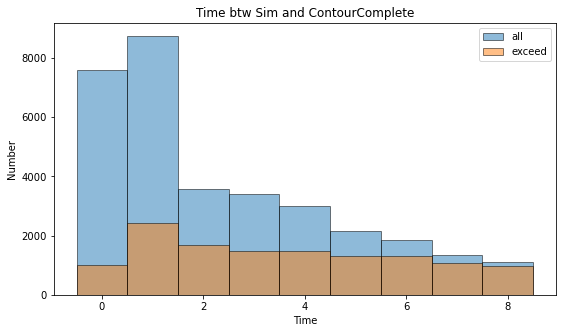

In [30]:
# Another way to estimate contouring duration is use time_btw_Sim_ContourComplete
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[(preTxDur['TimeBtw_Sim_ContourCompl']>=-20)&(preTxDur['TimeBtw_Sim_ContourCompl']<=20)]['TimeBtw_Sim_ContourCompl']
y = df_exceed[(df_exceed['TimeBtw_Sim_ContourCompl']>=-20)&(df_exceed['TimeBtw_Sim_ContourCompl']<=20)]['TimeBtw_Sim_ContourCompl']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('Time')
plt.ylabel('Number')
plt.title('Time btw Sim and ContourComplete')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

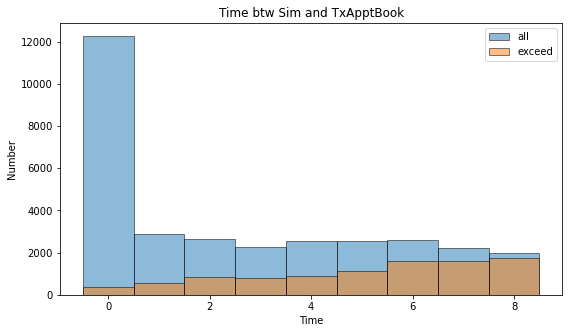

In [31]:
# 3rd way to estimate contouring duration is use TxApptBook - Sim
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[(preTxDur['TxApptBook-Sim']>=-20)&(preTxDur['TxApptBook-Sim']<=20)]['TxApptBook-Sim']
y = df_exceed[(df_exceed['TxApptBook-Sim']>=-20)&(df_exceed['TxApptBook-Sim']<=20)]['TxApptBook-Sim']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('Time')
plt.ylabel('Number')
plt.title('Time btw Sim and TxApptBook')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [32]:
preTxDur.columns

Index(['MRN', 'CreatedDate', 'SiteGroup', 'Diagnosis', 'Category_x',
       'PlanCreateDate', 'Team', 'GTV/CTVPromtDate', 'GTV/CTVCompleteDate',
       'ReviewDatePlaner', 'Location_x', 'FinalPlanPromtDate',
       'FinalPlanCompleteDate', 'PlanReviewRequestDate',
       'PlanProgressReviewDate', 'eBookingReviDate', 'SimApptDt',
       'SimApptCreatedDt', 'SimLocation', 'CTWait', 'TxStartDt',
       'TxApptCreatedDt', 'Sitegroup_y', 'TltDose', 'TxFracs', 'TxUnit',
       'Intent', 'TotalWaitTime', 'ContourDur', 'TimeBtw_Sim_ContourCompl',
       'TimeBtw_Sim_BkTx', 'Tx-TxBook', 'PlanDur', 'ContourWait',
       'TxApptBook-Sim', 'z_score_contour'],
      dtype='object')

In [33]:
df_seeContr = preTxDur[['MRN','Category_x','CreatedDate','ContourDur','TimeBtw_Sim_ContourCompl','TxApptBook-Sim',
                       'SimApptDt','GTV/CTVCompleteDate','TxApptCreatedDt','ReviewDatePlaner','TxStartDt']]
df_seeContr['diff']=df_seeContr['TimeBtw_Sim_ContourCompl']-df_seeContr['ContourDur']
#df_seeContr[(df_seeContr['diff']!=0)&(df_seeContr['diff'].notnull())]
df_seeContr[df_seeContr['ReviewDatePlaner'].notnull()]

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,MRN,Category_x,CreatedDate,ContourDur,TimeBtw_Sim_ContourCompl,TxApptBook-Sim,SimApptDt,GTV/CTVCompleteDate,TxApptCreatedDt,ReviewDatePlaner,TxStartDt,diff
3,5723,Standard 3,2013-07-11,13.0,20.0,12,2013-7-19,2013-08-08,2013-07-31,2013-07-31,2013-08-07,7.0
4,6291,Standard 3,2015-04-15,2.0,2.0,7,2015-4-21,2015-04-23,2015-04-28,2015-04-23,2015-04-29,0.0
10,10073,Standard 3,2017-09-01,1.0,1.0,9,2017-9-6,2017-09-07,2017-09-15,2017-09-14,2017-09-21,0.0
11,10287,Standard 3,2019-04-17,0.0,1.0,7,2019-4-30,2019-05-01,2019-05-07,2019-05-07,2019-05-13,1.0
13,12169,Standard 3,2020-08-25,3.0,3.0,9,2020-8-31,2020-09-03,2020-09-09,2020-09-09,2020-09-10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57620,4559692,Standard 3,2019-03-05,1.0,1.0,5,2019-3-7,2019-03-08,2019-03-12,2019-03-12,2019-03-27,0.0
57653,4651688,Standard 3,2019-06-10,1.0,1.0,-6,2019-6-10,2019-06-11,2019-06-04,2019-06-14,2019-06-17,0.0
57700,6059716,Standard 3,2010-02-19,NaN,NaN,0,2010-2-19,NaT,2010-02-19,2010-02-19,2010-02-19,NaN
57729,6242668,Standard 3,2020-08-28,1.0,1.0,-3,2020-8-31,2020-09-01,2020-08-28,2020-09-01,2020-09-04,0.0


#### Yearly Contouring trends

In [34]:
df['Sitegroup_y'].unique()

array(['LUNG', 'GENITOURINARY(GU)', 'GASTROINTESTINAL(GI)', 'BREAST',
       'GYNAE', 'LYMPHOMA', 'ENT (HEAD & NECK)', 'CNS', 'SARCOMA', 'SKIN',
       nan, 'UNKNOWN', 'LEUKEMIA', 'ENDOCRINE', 'EYE', 'NON CANCER DX',
       'PAEDIATRIC', 'OTHER SITES C76', 'Hodgkin Dis.'], dtype=object)

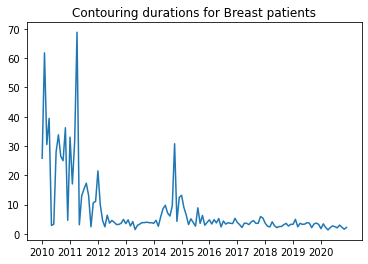

In [35]:
# breast, 
breast_contour = {}
years_month_list =[]
df_breast = df[df['Sitegroup_y']=='BREAST']
for y in range(2010, 2021): #2010-2020
    df_y = df_breast[df_breast['CreatedDate'].dt.year == y]
    
    for m in range(1,13):
        month_avg = df_y[df_y['CreatedDate'].dt.month == m]['TimeBtw_Sim_ContourCompl'].mean()
        years_month_list.append(month_avg)
    #breast_contour[y] = month_list
    

x = range(1,133)
y = years_month_list
plt.plot(x,y)
plt.xticks(np.arange(1, 133, step=12), labels=range(2010,2021))
plt.title("Contouring durations for Breast patients");

In [36]:
def remove_outliers(data, m=1):
    return data[abs(data - np.mean(data)) < m * np.std(data)]


In [37]:
def ContourDur_trend(sitegroup):
    site_contour = {}
    years_month_list =[] # ContourComplete - Sim
    years_month_list_2 =[] # ContourDur = ContourComplete - ContourPromt
    years_month_list_3 =[] # TxApptBook - Sim
    df_site = preTxDur[preTxDur['Sitegroup_y']==sitegroup]

    for y in range(2015, 2021): #2015-2020
        df_y = df_site[df_site['CreatedDate'].dt.year == y]
        month_list=[]
        for m in range(1,13):
            #remove outliers in each month
            monthly_data = df_y[df_y['CreatedDate'].dt.month == m]['TimeBtw_Sim_ContourCompl']
            month_avg = remove_outliers(monthly_data).mean()
            monthly_data_2 = df_y[df_y['CreatedDate'].dt.month == m]['ContourDur']
            month_avg_2 = remove_outliers(monthly_data_2).mean()
            monthly_data_3 = df_y[df_y['CreatedDate'].dt.month == m]['TxApptBook-Sim']
            month_avg_3 = remove_outliers(monthly_data_3).mean()
        
        
            years_month_list.append(month_avg)
            years_month_list_2.append(month_avg_2)
            years_month_list_3.append(month_avg_3)
        
            month_list.append(month_avg)
            site_contour[y] = month_list
            #print(site_contour[2018])

    x = range(1,73)
    y = years_month_list
    y2 = years_month_list_2
    y3 = years_month_list_3
    plt.plot(x,y,label='ContourCompl-Sim')
    plt.plot(x,y2,label='ContourDur')
    #plt.plot(x,y3,label='TxApptBook-Sim')
    plt.legend()
    plt.xticks(np.arange(1, 73, step=12), labels=range(2015,2021))
    plt.title("Mean contouring durations for patients " + sitegroup)
    plt.show();
    

In [38]:
df['Sitegroup_y'].unique()

array(['LUNG', 'GENITOURINARY(GU)', 'GASTROINTESTINAL(GI)', 'BREAST',
       'GYNAE', 'LYMPHOMA', 'ENT (HEAD & NECK)', 'CNS', 'SARCOMA', 'SKIN',
       nan, 'UNKNOWN', 'LEUKEMIA', 'ENDOCRINE', 'EYE', 'NON CANCER DX',
       'PAEDIATRIC', 'OTHER SITES C76', 'Hodgkin Dis.'], dtype=object)

LUNG


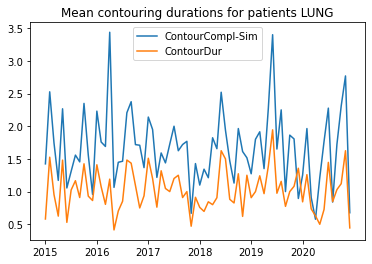

GENITOURINARY(GU)


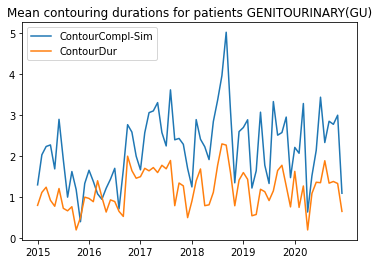

GASTROINTESTINAL(GI)


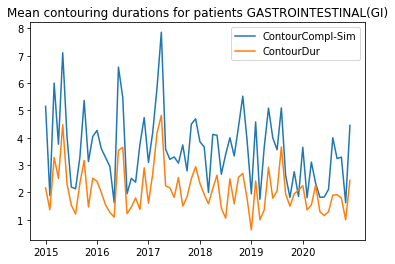

BREAST


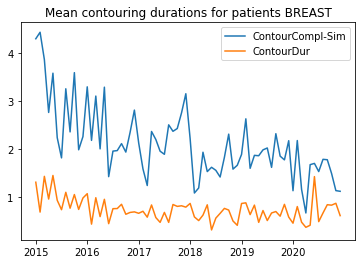

GYNAE


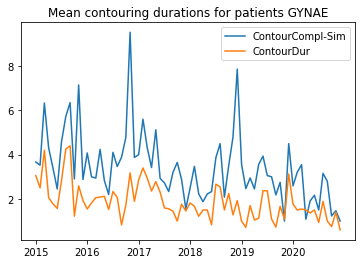

LYMPHOMA


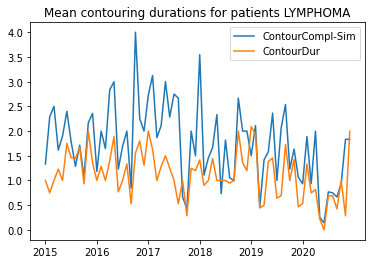

ENT (HEAD & NECK)


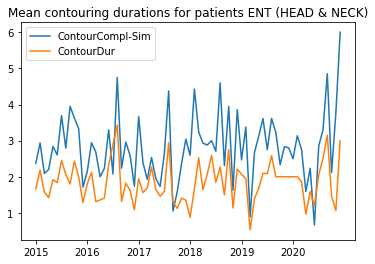

CNS


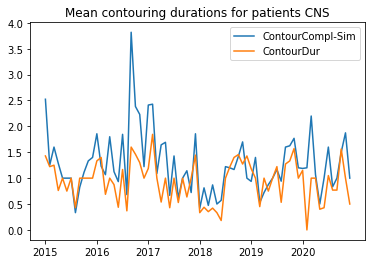

SARCOMA


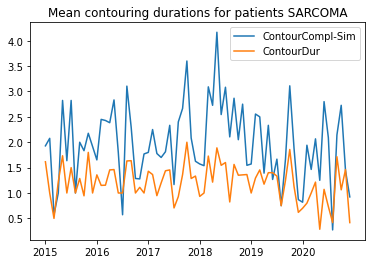

SKIN


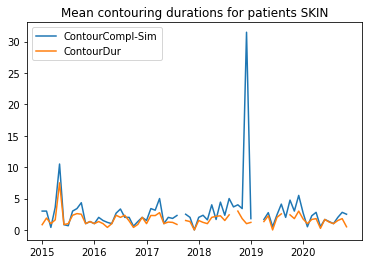

UNKNOWN


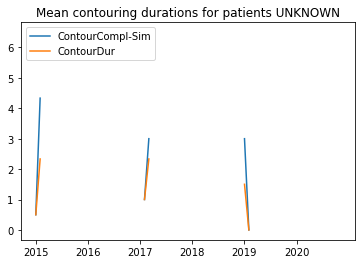

LEUKEMIA


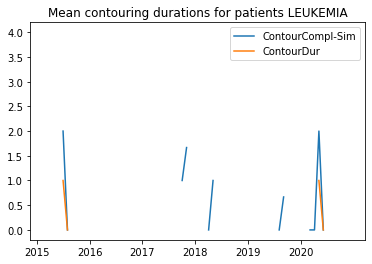

ENDOCRINE


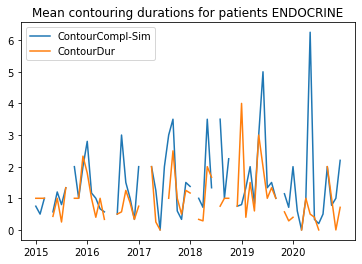

EYE


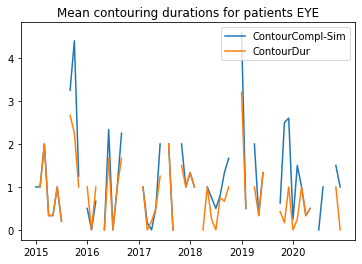

NON CANCER DX


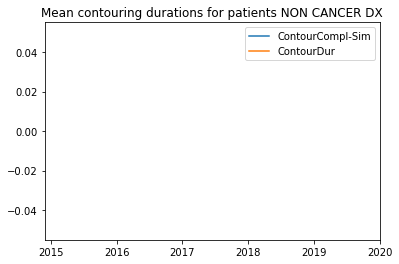

PAEDIATRIC


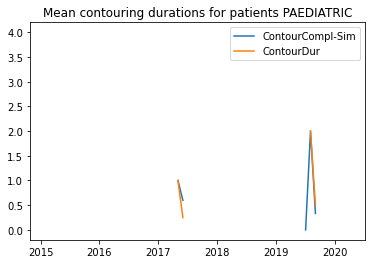

OTHER SITES C76


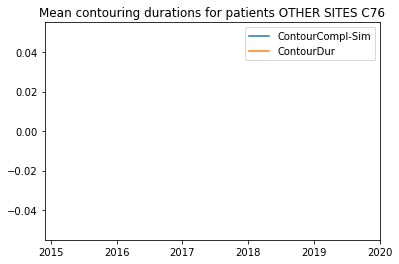

Hodgkin Dis.


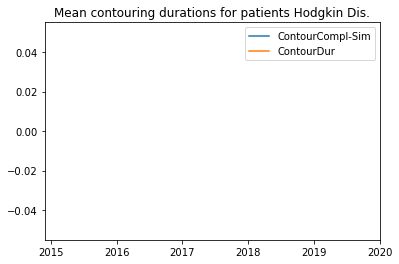

In [39]:
for s in df['Sitegroup_y'].unique():
    if s is not np.nan:
        print(s)
        ContourDur_trend(s)
    

### Contouring time estimation model

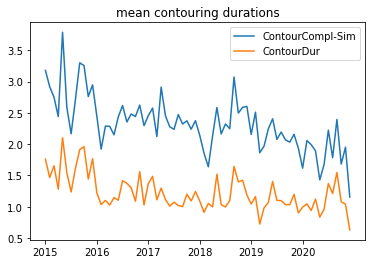

In [40]:
    site_contour = {}
    years_month_list =[] # ContourComplete - Sim
    years_month_list_2 =[] # ContourDur = ContourComplete - ContourPromt
    years_month_list_3 =[] # TxApptBook - Sim

    for y in range(2015, 2021): #2015-2020
        df_y = preTxDur[preTxDur['CreatedDate'].dt.year == y]
        month_list=[]
        for m in range(1,13):
            #remove outliers in each month
            monthly_data = df_y[df_y['CreatedDate'].dt.month == m]['TimeBtw_Sim_ContourCompl']
            month_avg = remove_outliers(monthly_data).mean()
            monthly_data_2 = df_y[df_y['CreatedDate'].dt.month == m]['ContourDur']
            month_avg_2 = remove_outliers(monthly_data_2).mean()
            monthly_data_3 = df_y[df_y['CreatedDate'].dt.month == m]['TxApptBook-Sim']
            month_avg_3 = remove_outliers(monthly_data_3).mean()
      
            years_month_list.append(month_avg)
            years_month_list_2.append(month_avg_2)
            years_month_list_3.append(month_avg_3)
        
            month_list.append(month_avg)
            site_contour[y] = month_list
            #print(site_contour[2018])

    x = range(1,73)
    y = years_month_list
    y2 = years_month_list_2
    y3 = years_month_list_3
    plt.plot(x,y,label='ContourCompl-Sim')
    plt.plot(x,y2,label='ContourDur')
    #plt.plot(x,y3,label='TxApptBook-Sim')
    plt.legend()
    plt.xticks(np.arange(1, 73, step=12), labels=range(2015,2021))
    plt.title("mean contouring durations")
    plt.show();

In [41]:
preTxDur.columns

Index(['MRN', 'CreatedDate', 'SiteGroup', 'Diagnosis', 'Category_x',
       'PlanCreateDate', 'Team', 'GTV/CTVPromtDate', 'GTV/CTVCompleteDate',
       'ReviewDatePlaner', 'Location_x', 'FinalPlanPromtDate',
       'FinalPlanCompleteDate', 'PlanReviewRequestDate',
       'PlanProgressReviewDate', 'eBookingReviDate', 'SimApptDt',
       'SimApptCreatedDt', 'SimLocation', 'CTWait', 'TxStartDt',
       'TxApptCreatedDt', 'Sitegroup_y', 'TltDose', 'TxFracs', 'TxUnit',
       'Intent', 'TotalWaitTime', 'ContourDur', 'TimeBtw_Sim_ContourCompl',
       'TimeBtw_Sim_BkTx', 'Tx-TxBook', 'PlanDur', 'ContourWait',
       'TxApptBook-Sim', 'z_score_contour'],
      dtype='object')

In [42]:
df1520 = preTxDur[pd.to_datetime(preTxDur['CreatedDate']).dt.year>=2015]
df1520.size

900360

### EDA

In [69]:
df1520.columns

Index(['MRN', 'CreatedDate', 'SiteGroup', 'Diagnosis', 'Category_x',
       'PlanCreateDate', 'Team', 'GTV/CTVPromtDate', 'GTV/CTVCompleteDate',
       'ReviewDatePlaner', 'Location_x', 'FinalPlanPromtDate',
       'FinalPlanCompleteDate', 'PlanReviewRequestDate',
       'PlanProgressReviewDate', 'eBookingReviDate', 'SimApptDt',
       'SimApptCreatedDt', 'SimLocation', 'CTWait', 'TxStartDt',
       'TxApptCreatedDt', 'Sitegroup_y', 'TltDose', 'TxFracs', 'TxUnit',
       'Intent', 'TotalWaitTime', 'ContourDur', 'TimeBtw_Sim_ContourCompl',
       'TimeBtw_Sim_BkTx', 'Tx-TxBook', 'PlanDur', 'ContourWait',
       'TxApptBook-Sim', 'z_score_contour'],
      dtype='object')

In [43]:
features = ['Sitegroup_y','Category_x','TltDose','TxFracs','Intent1']
dtf = df1520[['MRN'] + features + ['ContourDur']]
               #      'ContourDur','TimeBtw_Sim_ContourCompl']] # y - target
dtf=dtf[(dtf['ContourDur']<=30)&(dtf['ContourDur']>=0)]
dtf.head()


,MRN,Sitegroup_y,Category_x,TltDose,TxFracs,ContourDur
1,2918,LUNG,Urgent 2,2000.0,5.0,0.0
4,6291,GASTROINTESTINAL(GI),Standard 3,3600.0,20.0,2.0
5,7287,GENITOURINARY(GU),Urgent 2,1600.0,2.0,0.0
10,10073,BREAST,Standard 3,4240.0,16.0,1.0
11,10287,BREAST,Standard 3,4240.0,16.0,0.0


In [49]:
target_y="ContourDur"
dtf = df1520[features + [target_y]]
               #      'ContourDur','TimeBtw_Sim_ContourCompl']] # y - target
dtf=dtf[(dtf[target_y]<=30)&(dtf[target_y]>=0)]
dtf.head()


,Sitegroup_y,Category_x,TltDose,TxFracs,ContourDur
1,LUNG,Urgent 2,2000.0,5.0,0.0
4,GASTROINTESTINAL(GI),Standard 3,3600.0,20.0,2.0
5,GENITOURINARY(GU),Urgent 2,1600.0,2.0,0.0
10,BREAST,Standard 3,4240.0,16.0,1.0
11,BREAST,Standard 3,4240.0,16.0,0.0


In [50]:
dtf.head()

,Sitegroup_y,Category_x,TltDose,TxFracs,ContourDur
1,LUNG,Urgent 2,2000.0,5.0,0.0
4,GASTROINTESTINAL(GI),Standard 3,3600.0,20.0,2.0
5,GENITOURINARY(GU),Urgent 2,1600.0,2.0,0.0
10,BREAST,Standard 3,4240.0,16.0,1.0
11,BREAST,Standard 3,4240.0,16.0,0.0


In [51]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
#from lime import lime_tabular

In [52]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
# want to know how many categorical and numerical variables there are and the proportion of missing data.
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

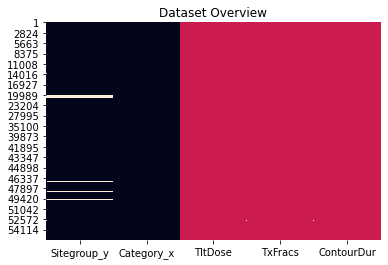

 Categerocial   Numeric   NaN 


In [53]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [54]:
# dtf = dtf.set_index("Id")
dtf = dtf.rename(columns={target_y:"Y"})

#### Visualisation
#### univariate distributions

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


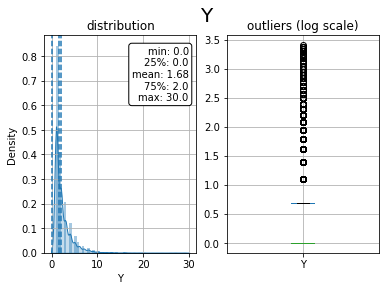

In [55]:
#A histogram is perfect to give a rough sense of the density of the underlying distribution of a single numerical data. 
#box plot to graphically depict data groups through their quartiles.

x = "Y"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


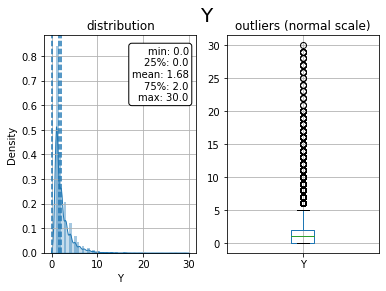

In [56]:
x = "Y"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].median()) # median
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (normal scale)')
#tmp_dtf = pd.DataFrame(dtf[x])
#tmp_dtf[x] = np.log(tmp_dtf[x])
#tmp_dtf.boxplot(column=x, ax=ax[1])
dtf.boxplot(column=x, ax=ax[1])
plt.show()

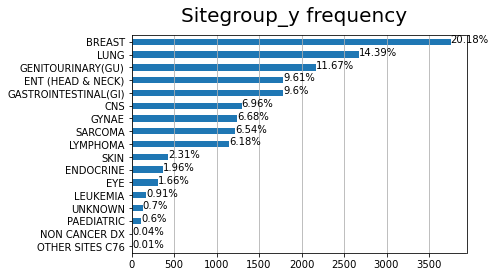

In [57]:
# Moreover, A bar plot is appropriate to understand labels frequency for a single categorical variable. 
x = "Sitegroup_y"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x+' frequency', fontsize=20)
plt.show()

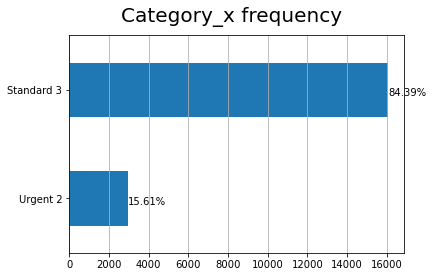

In [58]:
x = "Category_x"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x+' frequency', fontsize=20)
plt.show()

#### bivariate distribution to understand if SiteGroup has predictive power to predict Y. This would be the case of categorical (Sitegroup_y) vs numerical (Y)

In [59]:
#dtf.dropna(subset=['Sitegroup_y'], inplace=True)
dtf['Sitegroup_y'].unique()

array(['LUNG', 'GASTROINTESTINAL(GI)', 'GENITOURINARY(GU)', 'BREAST',
       'GYNAE', 'SARCOMA', 'LYMPHOMA', 'SKIN', 'ENT (HEAD & NECK)', 'CNS',
       nan, 'ENDOCRINE', 'LEUKEMIA', 'EYE', 'UNKNOWN', 'OTHER SITES C76',
       'NON CANCER DX', 'PAEDIATRIC'], dtype=object)

In [60]:
dtf = dtf.loc[dtf['Sitegroup_y'].isin(['LUNG', 'GENITOURINARY(GU)', 'GASTROINTESTINAL(GI)', 'BREAST',
                                   'GYNAE', 'LYMPHOMA', 'ENT (HEAD & NECK)', 'CNS', 'SARCOMA', 'SKIN',
                                   'ENDOCRINE', 'LEUKEMIA', 'EYE', 'UNKNOWN'])]


In [61]:
dtf.head()


,Sitegroup_y,Category_x,TltDose,TxFracs,Y
1,LUNG,Urgent 2,2000.0,5.0,0.0
4,GASTROINTESTINAL(GI),Standard 3,3600.0,20.0,2.0
5,GENITOURINARY(GU),Urgent 2,1600.0,2.0,0.0
10,BREAST,Standard 3,4240.0,16.0,1.0
11,BREAST,Standard 3,4240.0,16.0,0.0


/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

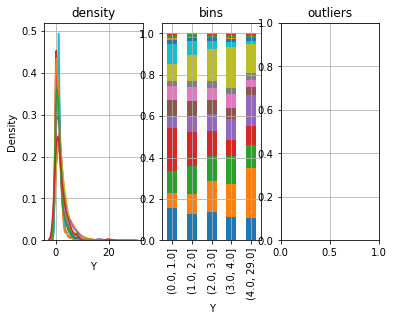

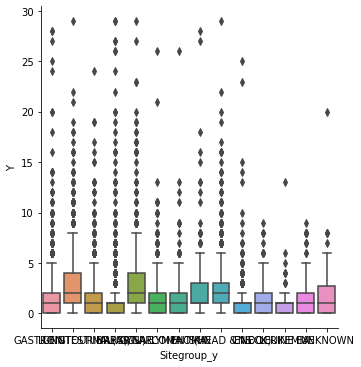

In [62]:
cat, num = "Sitegroup_y", "Y"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
#fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():
    sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)


### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[dtf[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[2])
ax[2].grid(True)

plt.show()

In [63]:
dtf = dtf[dtf['Category_x'].notnull()]
dtf.size

92390

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


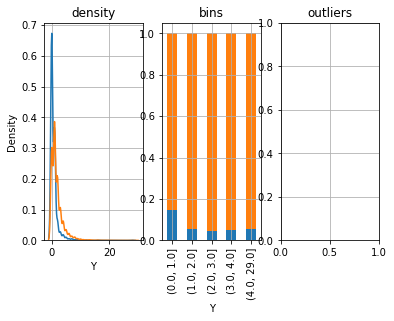

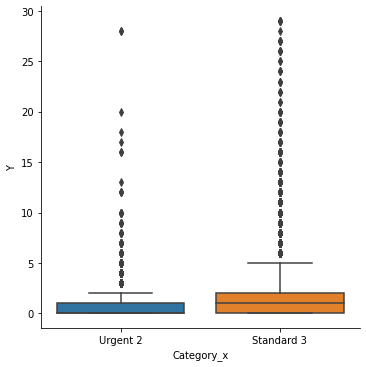

In [64]:
cat, num = "Category_x", "Y"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
#fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():
    sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)


### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[dtf[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[2])
ax[2].grid(True)

plt.show()

#### ANOVA tests for features

In [65]:
cat, num = "Sitegroup_y", "Y"
model = smf.ols(num+' ~ '+cat, data=dtf).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


In [66]:
cat, num = "Category_x", "Y"
model = smf.ols(num+' ~ '+cat, data=dtf).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


In [67]:
cat, num = "Intent1", "Y"
model = smf.ols(num+' ~ '+cat, data=dtf).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

PatsyError: Error evaluating factor: NameError: name 'Intent1' is not defined
    Y ~ Intent1
        ^^^^^^^

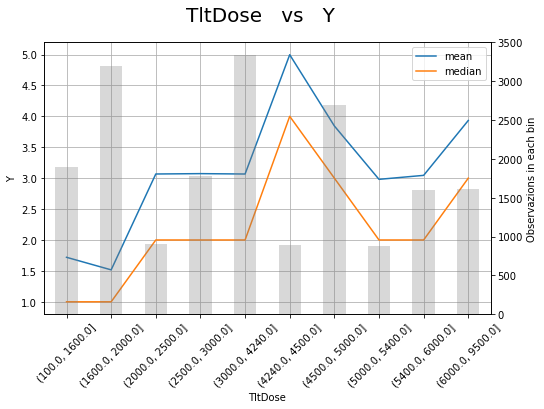

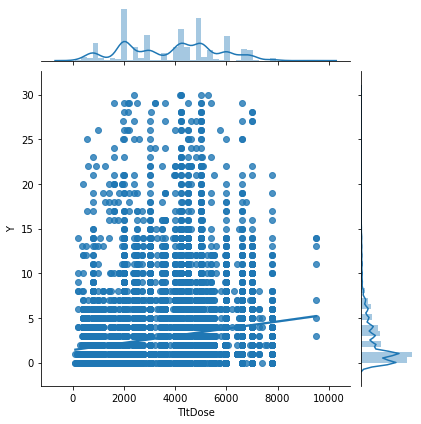

In [130]:
# behavior of the target variable with respect to TltDose 
# This is a case of numerical (TltDose) vs numerical (Y)
x, y = "TltDose", "Y"
figsize=[8,5]
### bin plot
### group GrLivArea values into bins and compare the mean value (and median) of Y in each bin, 
### if the curve isn’t flat then the variable is predictive because the bins have different patterns
dtf_noNan = dtf[dtf[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
fig, ax = plt.subplots(figsize=figsize)
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()

### scatter plot
### distributions of the two variables on the sides
sns.jointplot(x=x, y=y, data=dtf, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
plt.show()

In [131]:
### test the correlation between these 2 variables. 
### Since they are both numerical, I’d test the Pearson’s Correlation Coefficient:
x, y = "TltDose", "Y"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")


Pearson Correlation: 0.19 Significant (p-value: 0.0)


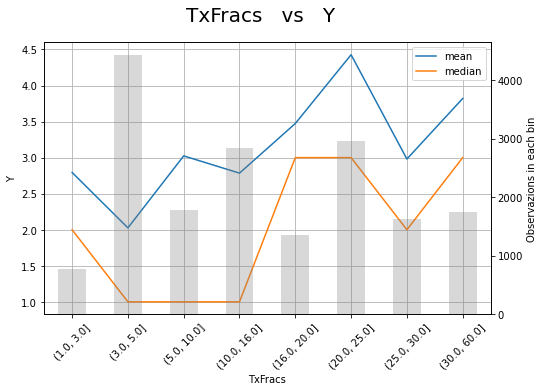

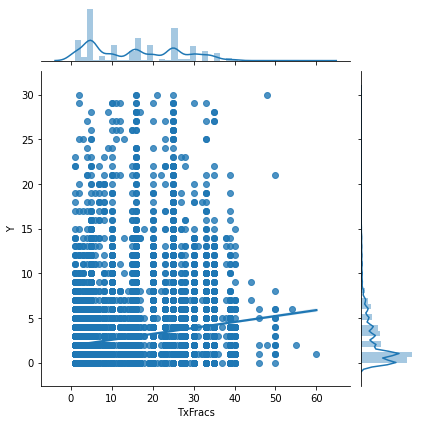

In [132]:
x, y = "TxFracs", "Y"
figsize=[8,5]
### bin plot
### group GrLivArea values into bins and compare the mean value (and median) of Y in each bin, 
### if the curve isn’t flat then the variable is predictive because the bins have different patterns
dtf_noNan = dtf[dtf[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
fig, ax = plt.subplots(figsize=figsize)
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()

### scatter plot
### distributions of the two variables on the sides
sns.jointplot(x=x, y=y, data=dtf, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
plt.show()


In [133]:
x, y = "TxFracs", "Y"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.193 Significant (p-value: 0.0)


In [389]:
dtf['product']=dtf['TltDose']*dtf['TxFracs']
dtf['ratio']=dtf['TltDose']/dtf['TxFracs']

<ipython-input-389-05bf1f698727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf['product']=dtf['TltDose']*dtf['TxFracs']
<ipython-input-389-05bf1f698727>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf['ratio']=dtf['TltDose']/dtf['TxFracs']


In [393]:
x, y = "ratio", target_y
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.022 Non-Significant (p-value: 0.172)


#### Feature Engineering

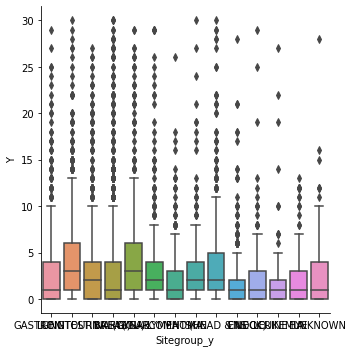

In [134]:
sns.catplot(x="Sitegroup_y", y="Y", data=dtf, kind="box")

In [135]:
dtf.size

93960

### Model

In [136]:
dtf.head()


,Sitegroup_y,Category_x,TltDose,TxFracs,Y
1,LUNG,Urgent 2,2000.0,5.0,0.0
4,GASTROINTESTINAL(GI),Standard 3,3600.0,20.0,2.0
5,GENITOURINARY(GU),Urgent 2,1600.0,2.0,0.0
10,BREAST,Standard 3,4240.0,16.0,1.0
11,BREAST,Standard 3,4240.0,16.0,1.0


In [137]:
# train test split
## split data
dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      test_size=0.3)
## print info
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())


X_train shape: (13154, 4) | X_test shape: (5638, 4)
y_train mean: 2.91 | y_test mean: 3.01
5 features: ['Sitegroup_y', 'Category_x', 'TltDose', 'TxFracs']


#### Pre-processing

In [138]:
# fill na 
dtf_train["Sitegroup_y"] = dtf_train["Sitegroup_y"].fillna(dtf_train["Sitegroup_y"].mode())
dtf_train["TltDose"] = dtf_train["TltDose"].fillna(dtf_train["TltDose"].median())
dtf_train["TxFracs"] = dtf_train["TxFracs"].fillna(dtf_train["TxFracs"].median())

dtf_test["Sitegroup_y"] = dtf_test["Sitegroup_y"].fillna(dtf_test["Sitegroup_y"].mode())
dtf_test["TltDose"] = dtf_test["TltDose"].fillna(dtf_test["TltDose"].median())
dtf_test["TxFracs"] = dtf_test["TxFracs"].fillna(dtf_test["TxFracs"].median())


<ipython-input-138-2290e7bce7a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_train["Sitegroup_y"] = dtf_train["Sitegroup_y"].fillna(dtf_train["Sitegroup_y"].mode())
<ipython-input-138-2290e7bce7a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_train["TltDose"] = dtf_train["TltDose"].fillna(dtf_train["TltDose"].median())
<ipython-input-138-2290e7bce7a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [139]:
#from sklearn.preprocessing import OneHotEncoder
## create dummy
dummy = pd.get_dummies(dtf_train[["Sitegroup_y","Category_x"]], 
                       prefix=['Site','Categ']) #, drop_first=True)
dtf_train= pd.concat([dtf_train, dummy], axis=1)
print( dtf_train.filter(like="Sitegroup_y",axis=1).head() )
## drop the original categorical column
dtf_train = dtf_train.drop(['Sitegroup_y','Category_x'], axis=1)


      Sitegroup_y
48532   ENDOCRINE
36836         CNS
49195        LUNG
47088     SARCOMA
11865       GYNAE


In [140]:
## create dummy
dummy = pd.get_dummies(dtf_test[["Sitegroup_y","Category_x"]], 
                       prefix=['Site','Categ']) #, drop_first=True)
dtf_test= pd.concat([dtf_test, dummy], axis=1)
print( dtf_test.filter(like="Sitegroup_y",axis=1).head() )
## drop the original categorical column
dtf_test = dtf_test.drop(['Sitegroup_y','Category_x'], axis=1)


                Sitegroup_y
45380               SARCOMA
46526                BREAST
47133               SARCOMA
15581                BREAST
42673  GASTROINTESTINAL(GI)


In [141]:
from sklearn.preprocessing import RobustScaler
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_train.drop("Y", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("Y", axis=1).columns, index=dtf_train.index)

## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled[y] = scalerY.fit_transform(dtf_train[y].values.reshape(-1,1))


In [69]:
'''
## scale X - test
scalerXtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerXtest.fit_transform(dtf_test.drop("Y", axis=1))
dtf_scaled_test= pd.DataFrame(X, columns=dtf_test.drop("Y", axis=1).columns, index=dtf_test.index)

## scale Y - test
scalerYtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled_test[y] = scalerYtest.fit_transform(dtf_test[y].values.reshape(-1,1))
'''

'\n## scale X - test\nscalerXtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))\nX = scalerXtest.fit_transform(dtf_test.drop("Y", axis=1))\ndtf_scaled_test= pd.DataFrame(X, columns=dtf_test.drop("Y", axis=1).columns, index=dtf_test.index)\n\n## scale Y - test\nscalerYtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))\ndtf_scaled_test[y] = scalerYtest.fit_transform(dtf_test[y].values.reshape(-1,1))\n'

Text(0.5, 1.0, 'pearson correlation')

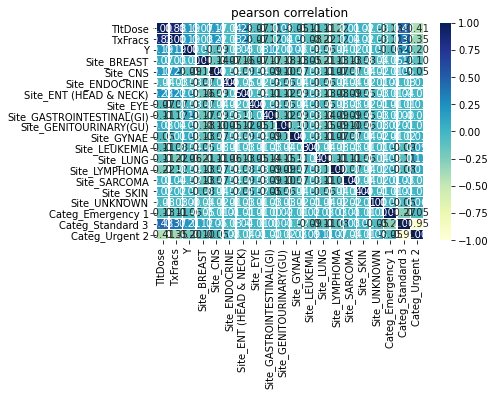

In [142]:
corr_matrix = dtf_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

#### Feature importance

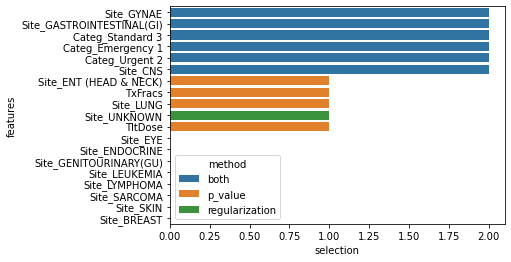

In [143]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

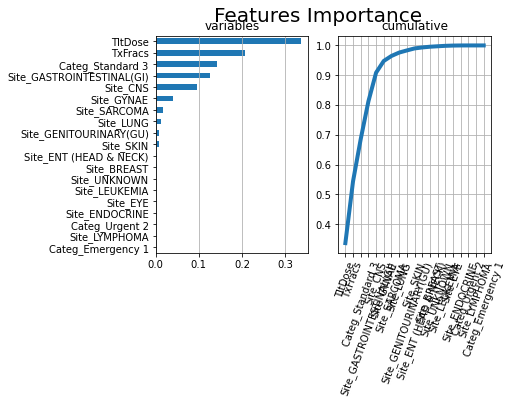

In [144]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()


In [145]:
dtf_train.columns


Index(['TltDose', 'TxFracs', 'Y', 'Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE',
       'Site_ENT (HEAD & NECK)', 'Site_EYE', 'Site_GASTROINTESTINAL(GI)',
       'Site_GENITOURINARY(GU)', 'Site_GYNAE', 'Site_LEUKEMIA', 'Site_LUNG',
       'Site_LYMPHOMA', 'Site_SARCOMA', 'Site_SKIN', 'Site_UNKNOWN',
       'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2'],
      dtype='object')

#### Using some features

In [74]:
X_names = ['TxFracs', 'Site_GASTROINTESTINAL(GI)', 'TltDose', 'Site_BREAST','Categ_Standard 3','Site_CNS','Site_GYNAE',
          'Site_ENT (HEAD & NECK)','Site_SKIN']
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values


#### regression models

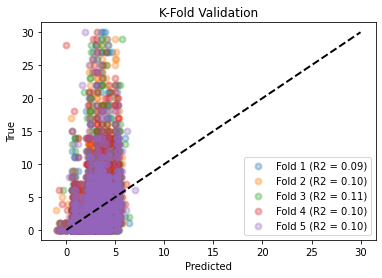

In [75]:
#simple linear regression and use it as a baseline
## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
    
### plotting predicted values against the actual Y
### Ideally, points should be all close to a diagonal line where predicted = actual
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()
### The first metric I normally use is the R squared, which indicates
### the proportion of the variance in the dependent variable that is predictable from the independent variable

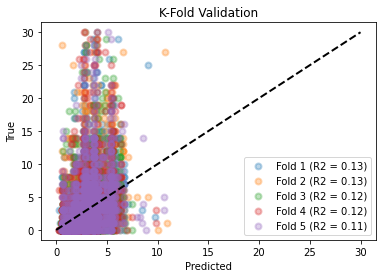

In [76]:
## call model
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0
                                 )
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
    
### plotting predicted values against the actual Y
### Ideally, points should be all close to a diagonal line where predicted = actual
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

### Classification

In [586]:
target_y = "TimeBtw_Sim_BkTx"

(1017, 36)


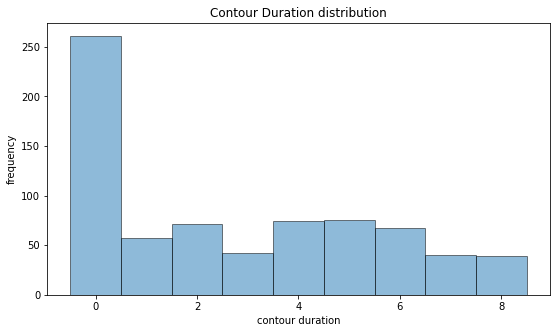

In [587]:
# use more recent data
df19=preTxDur[(pd.to_datetime(preTxDur['CreatedDate']).dt.date>=pd.to_datetime("2019-10-01")) 
                &(pd.to_datetime(preTxDur['CreatedDate']).dt.year<2020)]
print(df19.shape)

plt.figure(figsize=[9,5])
bins = range(0,10)

y = df19[target_y]
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('contour duration')
plt.ylabel('frequency')
plt.title('Contour Duration distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [588]:
df19.shape


(1017, 36)

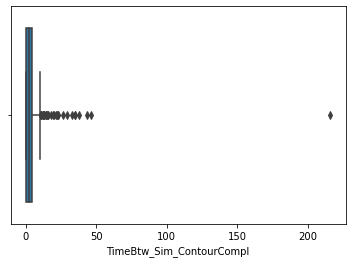

In [685]:
import seaborn as sns
sns.boxplot(x= df_pos[target_y])

In [706]:
features

['Sitegroup_y', 'Category_x', 'TltDose', 'TxFracs']

In [607]:
df_clf = df19[features + [target_y]]
               #      'ContourDur','TimeBtw_Sim_ContourCompl']] # y - target
#df_clf=dtf[(dtf[target_y]<=30)&(dtf[target_y]>=0)]
df_clf.head()


,Sitegroup_y,Category_x,TltDose,TxFracs,TimeBtw_Sim_BkTx
93,LUNG,Standard 3,6000.0,20.0,7
306,CNS,Standard 3,5400.0,30.0,5
324,GENITOURINARY(GU),Urgent 2,2000.0,5.0,0
337,ENT (HEAD & NECK),Standard 3,400.0,2.0,-6
376,GASTROINTESTINAL(GI),Standard 3,5250.0,30.0,9


In [608]:
df_clf.shape

(1017, 5)

In [609]:
df_clf = df_clf[df_clf['Sitegroup_y'].notnull()]
df_clf['Sitegroup_y'].unique()


array(['LUNG', 'CNS', 'GENITOURINARY(GU)', 'ENT (HEAD & NECK)',
       'GASTROINTESTINAL(GI)', 'GYNAE', 'LYMPHOMA', 'SARCOMA', 'BREAST',
       'ENDOCRINE', 'LEUKEMIA', 'EYE', 'SKIN', 'PAEDIATRIC', 'UNKNOWN'],
      dtype=object)

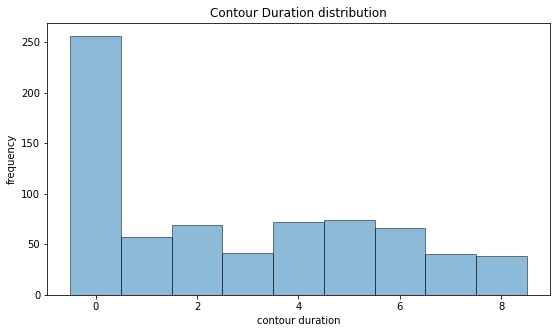

In [610]:
plt.figure(figsize=[9,5])
bins = range(0,10)

y = df_clf[target_y]
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('contour duration')
plt.ylabel('frequency')
plt.title('Contour Duration distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [611]:
y = df_clf[target_y]
#removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
#index_names = df_clf[~removed_outliers].index 
#df_clf.drop(index_names, inplace=True)

print(str(len(df_clf.index)) + "/" + str(y.size) + " data points remain.") 


997/997 data points remain.


In [612]:
# fill na
df_clf["Sitegroup_y"] = df_clf["Sitegroup_y"].fillna(df_clf["Sitegroup_y"].mode())
df_clf["TltDose"] = df_clf["TltDose"].fillna(df_clf["TltDose"].median())
df_clf["TxFracs"] = df_clf["TxFracs"].fillna(df_clf["TxFracs"].median())


In [613]:
# dummy
## create dummy
dummy = pd.get_dummies(df_clf[["Sitegroup_y","Category_x"]], prefix=['Site','Categ']) #, drop_first=True)
dummy.columns

Index(['Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE', 'Site_ENT (HEAD & NECK)',
       'Site_EYE', 'Site_GASTROINTESTINAL(GI)', 'Site_GENITOURINARY(GU)',
       'Site_GYNAE', 'Site_LEUKEMIA', 'Site_LUNG', 'Site_LYMPHOMA',
       'Site_PAEDIATRIC', 'Site_SARCOMA', 'Site_SKIN', 'Site_UNKNOWN',
       'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2'],
      dtype='object')

In [614]:
df_clf = pd.concat([df_clf, dummy], axis=1)
#print( df_clf.filter(like="Sitegroup_y",axis=1).head() )

## drop the original categorical column
df_clf = df_clf.drop(['Sitegroup_y','Category_x'], axis=1)
df_clf.head()

,TltDose,TxFracs,TimeBtw_Sim_BkTx,Site_BREAST,Site_CNS,Site_ENDOCRINE,Site_ENT (HEAD & NECK),Site_EYE,Site_GASTROINTESTINAL(GI),Site_GENITOURINARY(GU),...,Site_LEUKEMIA,Site_LUNG,Site_LYMPHOMA,Site_PAEDIATRIC,Site_SARCOMA,Site_SKIN,Site_UNKNOWN,Categ_Emergency 1,Categ_Standard 3,Categ_Urgent 2
93,6000.0,20.0,7,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
306,5400.0,30.0,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
324,2000.0,5.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
337,400.0,2.0,-6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
376,5250.0,30.0,9,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


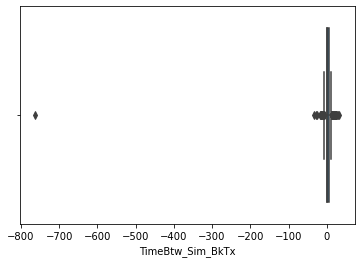

In [674]:
import seaborn as sns
sns.boxplot(x = df_clf['TimeBtw_Sim_BkTx'])

In [615]:
# train-test split
df_train, df_test = model_selection.train_test_split(df_clf, test_size=0.3)
## print info
print("X_train shape:", df_train.drop(target_y,axis=1).shape, "| X_test shape:", df_test.drop(target_y,axis=1).shape)
print("y_train mean:", round(np.mean(df_train[target_y]),2), "| y_test mean:", round(np.mean(df_test[target_y]),2))
print(df_train.shape[1], "features:", df_train.drop(target_y,axis=1).columns.to_list())

X_train shape: (697, 20) | X_test shape: (300, 20)
y_train mean: 0.97 | y_test mean: 2.25
21 features: ['TltDose', 'TxFracs', 'Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE', 'Site_ENT (HEAD & NECK)', 'Site_EYE', 'Site_GASTROINTESTINAL(GI)', 'Site_GENITOURINARY(GU)', 'Site_GYNAE', 'Site_LEUKEMIA', 'Site_LUNG', 'Site_LYMPHOMA', 'Site_PAEDIATRIC', 'Site_SARCOMA', 'Site_SKIN', 'Site_UNKNOWN', 'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2']


In [616]:
# copy df_test
df_test_copy=df_test

In [617]:
# reorganise the classes
# 0-1, class 0; 2-5, class 1, >5, class 2
df_train.loc[df_train[target_y] <=0, 'ContourGroup'] = 0
df_train.loc[(df_train[target_y] <=4)&(df_train[target_y]>=1), 'ContourGroup'] = 1
df_train.loc[df_train[target_y] >=5, 'ContourGroup'] = 2
df_train = df_train.drop(columns=[target_y])

df_test.loc[df_test[target_y] <=0, 'ContourGroup'] = 0
df_test.loc[(df_test[target_y] <=4)&(df_test[target_y]>=1), 'ContourGroup'] = 1
df_test.loc[df_test[target_y] >=5, 'ContourGroup'] = 2
df_test = df_test.drop(columns=[target_y])


/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


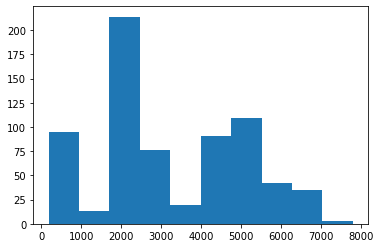

In [618]:
plt.hist(df_train['TltDose']);


### Trying simple mean method ... Not good

In [347]:
df_mean = df_clf
df_mean.head()

,Sitegroup_y,Category_x,TltDose,TxFracs,TimeBtw_Sim_BkTx
13,GYNAE,Standard 3,2500.0,10.0,9
25,BREAST,Standard 3,2750.0,5.0,3
26,BREAST,Urgent,2000.0,5.0,0
56,ENT (HEAD & NECK),Urgent,800.0,1.0,0
57,ENT (HEAD & NECK),Urgent,800.0,1.0,0


In [349]:
df_mean['Sitegroup_y'].unique()

array(['GYNAE', 'BREAST', 'ENT (HEAD & NECK)', 'CNS', 'LUNG',
       'GASTROINTESTINAL(GI)', 'GENITOURINARY(GU)', 'SARCOMA', 'LYMPHOMA',
       'LEUKEMIA', 'EYE', 'ENDOCRINE', 'SKIN', 'UNKNOWN', 'PAEDIATRIC',
       'NON CANCER DX', 'Non Cancer Dx'], dtype=object)

In [365]:
df_mean['Category_x'].replace("Emergency 1","Urgent", inplace=True)
df_mean['Category_x'].replace("Urgent 2","Urgent", inplace=True)
df_mean['Sitegroup_y'].replace("Non Cancer Dx","NON CANCER DX", inplace=True)
df_mean.dropna(subset=['Sitegroup_y', 'Category_x'])

,Sitegroup_y,Category_x,TltDose,TxFracs,TimeBtw_Sim_BkTx
13,GYNAE,Standard 3,2500.0,10.0,9
25,BREAST,Standard 3,2750.0,5.0,3
26,BREAST,Urgent,2000.0,5.0,0
56,ENT (HEAD & NECK),Urgent,800.0,1.0,0
57,ENT (HEAD & NECK),Urgent,800.0,1.0,0
...,...,...,...,...,...
57695,LUNG,Standard 3,2000.0,5.0,0
57697,GASTROINTESTINAL(GI),Standard 3,800.0,1.0,0
57749,SKIN,Standard 3,2000.0,5.0,0
57757,LUNG,Standard 3,3000.0,5.0,4


In [366]:
# train-test split
df_train, df_test = model_selection.train_test_split(df_mean, test_size=0.3)
## print info
print("X_train shape:", df_train.shape, "| X_test shape:", df_test.shape)
print("y_train mean:", round(np.mean(df_train[target_y]),2), "| y_test mean:", round(np.mean(df_test[target_y]),2))
print(df_train.shape[1], "features:", df_train.drop(target_y,axis=1).columns.to_list())

X_train shape: (2016, 5) | X_test shape: (864, 5)
y_train mean: 3.21 | y_test mean: 3.36
5 features: ['Sitegroup_y', 'Category_x', 'TltDose', 'TxFracs']


In [367]:
df_train.head()

,Sitegroup_y,Category_x,TltDose,TxFracs,TimeBtw_Sim_BkTx
52927,BREAST,Standard 3,4256.0,16.0,2
9477,BREAST,Standard 3,2850.0,5.0,4
6438,GYNAE,Standard 3,4500.0,25.0,8
46176,GENITOURINARY(GU),Standard 3,2400.0,3.0,6
52330,SARCOMA,Standard 3,2400.0,2.0,8


In [368]:
df_test.head()

,Sitegroup_y,Category_x,TltDose,TxFracs,TimeBtw_Sim_BkTx
54751,GENITOURINARY(GU),Standard 3,4270.0,7.0,5
56476,GASTROINTESTINAL(GI),Urgent,2000.0,5.0,3
5947,SKIN,Standard 3,6000.0,25.0,0
5401,BREAST,Standard 3,4005.0,15.0,6
55516,GENITOURINARY(GU),Standard 3,6000.0,20.0,6


In [369]:
mean_train = df_train.groupby(by=['Sitegroup_y','Category_x'])[target_y].median().reset_index()
#mean_train = mean_train[['Sitegroup_y','Category_x',]]
mean_train.head()

,Sitegroup_y,Category_x,TimeBtw_Sim_BkTx
0,BREAST,Standard 3,4.0
1,BREAST,Urgent,0.0
2,CNS,Standard 3,2.0
3,CNS,Urgent,0.0
4,ENDOCRINE,Standard 3,2.0


In [370]:
#from collections import defaultdict
#dict_train = defaultdict(dict)
dict_train = mean_train.set_index(['Sitegroup_y','Category_x']).to_dict()
#dict_train

In [371]:
dict_train[target_y]

{('BREAST', 'Standard 3'): 4.0,
 ('BREAST', 'Urgent'): 0.0,
 ('CNS', 'Standard 3'): 2.0,
 ('CNS', 'Urgent'): 0.0,
 ('ENDOCRINE', 'Standard 3'): 2.0,
 ('ENDOCRINE', 'Urgent'): 0.0,
 ('ENT (HEAD & NECK)', 'Standard 3'): 3.5,
 ('ENT (HEAD & NECK)', 'Urgent'): 0.0,
 ('EYE', 'Standard 3'): 1.5,
 ('EYE', 'Urgent'): 0.0,
 ('GASTROINTESTINAL(GI)', 'Standard 3'): 5.0,
 ('GASTROINTESTINAL(GI)', 'Urgent'): 0.0,
 ('GENITOURINARY(GU)', 'Standard 3'): 5.5,
 ('GENITOURINARY(GU)', 'Urgent'): 0.0,
 ('GYNAE', 'Standard 3'): 5.0,
 ('GYNAE', 'Urgent'): 0.0,
 ('LEUKEMIA', 'Standard 3'): 1.0,
 ('LEUKEMIA', 'Urgent'): 0.0,
 ('LUNG', 'Standard 3'): 3.0,
 ('LUNG', 'Urgent'): 0.0,
 ('LYMPHOMA', 'Standard 3'): 2.5,
 ('LYMPHOMA', 'Urgent'): 0.0,
 ('NON CANCER DX', 'Standard 3'): 6.0,
 ('PAEDIATRIC', 'Standard 3'): 0.5,
 ('PAEDIATRIC', 'Urgent'): 0.0,
 ('SARCOMA', 'Standard 3'): 4.0,
 ('SARCOMA', 'Urgent'): 0.0,
 ('SKIN', 'Standard 3'): 3.0,
 ('SKIN', 'Urgent'): 0.0,
 ('UNKNOWN', 'Standard 3'): 4.0,
 ('UNKNOWN', '

In [358]:
dict_train[target_y].update({("PAEDIATRIC","Urgent"):0})

In [384]:
new_list=[]
for index, row in df_test.iterrows():
    #print(row['Sitegroup_y'],row['Category_x'])
    value = dict_train[target_y][(row['Sitegroup_y'],row['Category_x'])]
    new_list.append(int(value))
#new_list   

In [385]:
df_test['pred']=new_list
df_test.head()

<ipython-input-385-a0c24853277a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred']=new_list


,Sitegroup_y,Category_x,TltDose,TxFracs,TimeBtw_Sim_BkTx,pred
54751,GENITOURINARY(GU),Standard 3,4270.0,7.0,5,5
56476,GASTROINTESTINAL(GI),Urgent,2000.0,5.0,3,0
5947,SKIN,Standard 3,6000.0,25.0,0,3
5401,BREAST,Standard 3,4005.0,15.0,6,4
55516,GENITOURINARY(GU),Standard 3,6000.0,20.0,6,5


In [386]:
# accuracy?
from sklearn.metrics import accuracy_score
#dtree_model.score(df_test[target_y], df_test['pred'])
accuracy_score(df_test[target_y], df_test['pred'])

0.3263888888888889

### dummy

In [515]:
## create dummy
#dummy = pd.get_dummies(df_clf[["Sitegroup_y","Category_x"]], prefix=['Site','Categ']) #, drop_first=True)
#dummy.columns


Index(['Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE', 'Site_ENT (HEAD & NECK)',
       'Site_EYE', 'Site_GASTROINTESTINAL(GI)', 'Site_GENITOURINARY(GU)',
       'Site_GYNAE', 'Site_LEUKEMIA', 'Site_LUNG', 'Site_LYMPHOMA',
       'Site_PAEDIATRIC', 'Site_SARCOMA', 'Site_SKIN', 'Site_UNKNOWN',
       'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2'],
      dtype='object')

In [516]:
'''df_clf = pd.concat([df_clf, dummy], axis=1)
#print( df_clf.filter(like="Sitegroup_y",axis=1).head() )

## drop the original categorical column
df_clf = df_clf.drop(['Sitegroup_y','Category_x'], axis=1)
df_clf.head()'''


,TltDose,TxFracs,ContourGroup,Site_BREAST,Site_CNS,Site_ENDOCRINE,Site_ENT (HEAD & NECK),Site_EYE,Site_GASTROINTESTINAL(GI),Site_GENITOURINARY(GU),...,Site_LEUKEMIA,Site_LUNG,Site_LYMPHOMA,Site_PAEDIATRIC,Site_SARCOMA,Site_SKIN,Site_UNKNOWN,Categ_Emergency 1,Categ_Standard 3,Categ_Urgent 2
93,6000.0,20.0,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
306,5400.0,30.0,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
324,2000.0,5.0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
337,400.0,2.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
376,5250.0,30.0,2.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [517]:
# train-test split
'''df_train, df_test = model_selection.train_test_split(df_clf, test_size=0.3)
## print info
print("X_train shape:", df_train.drop("ContourGroup",axis=1).shape, "| X_test shape:", df_test.drop("ContourGroup",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["ContourGroup"]),2), "| y_test mean:", round(np.mean(df_test["ContourGroup"]),2))
print(df_train.shape[1], "features:", df_train.drop("ContourGroup",axis=1).columns.to_list())'''

X_train shape: (697, 20) | X_test shape: (300, 20)
y_train mean: 0.83 | y_test mean: 0.83
21 features: ['TltDose', 'TxFracs', 'Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE', 'Site_ENT (HEAD & NECK)', 'Site_EYE', 'Site_GASTROINTESTINAL(GI)', 'Site_GENITOURINARY(GU)', 'Site_GYNAE', 'Site_LEUKEMIA', 'Site_LUNG', 'Site_LYMPHOMA', 'Site_PAEDIATRIC', 'Site_SARCOMA', 'Site_SKIN', 'Site_UNKNOWN', 'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2']


#### Feature selection

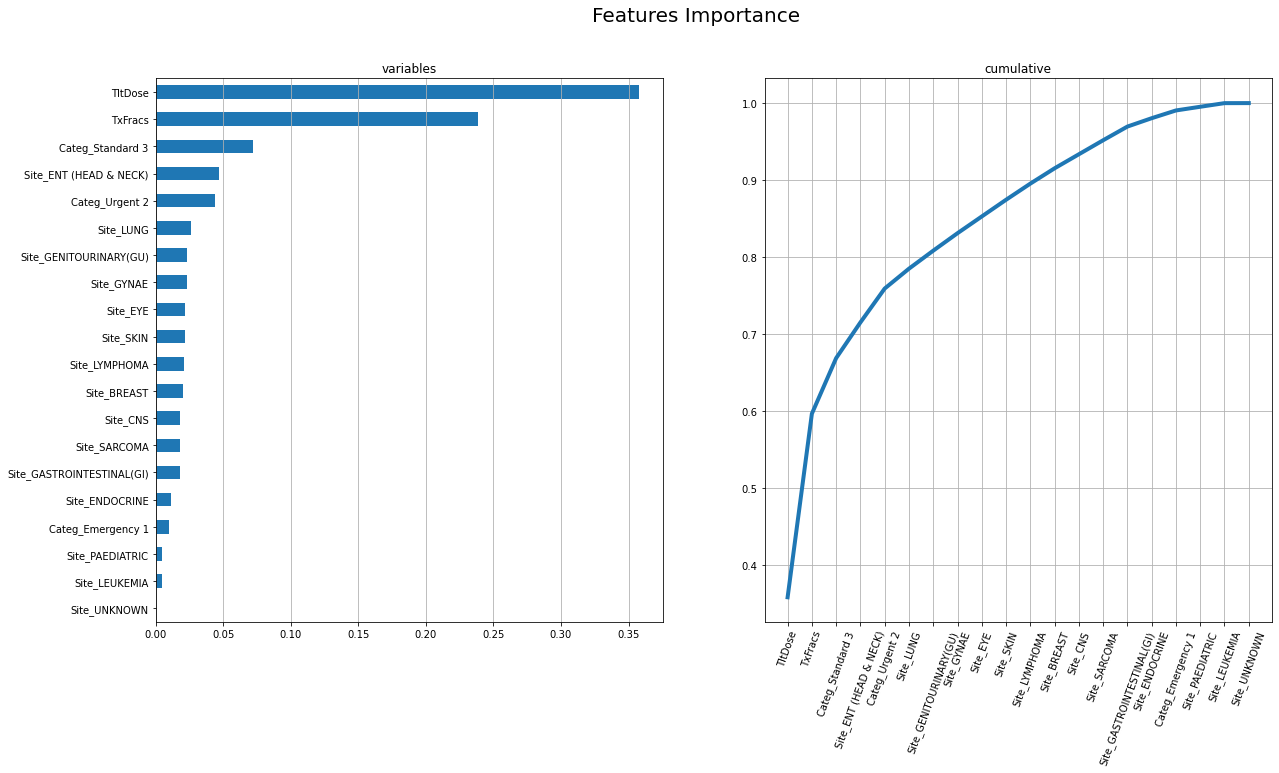

In [619]:
# random forest to select features
X_train = df_train.drop("ContourGroup", axis=1).values
y_train = df_train["ContourGroup"].values

X_test = df_test.drop("ContourGroup", axis=1).values
y_test = df_test["ContourGroup"].values
feature_names = df_train.drop("ContourGroup", axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X_train,y_train)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20, 10))
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

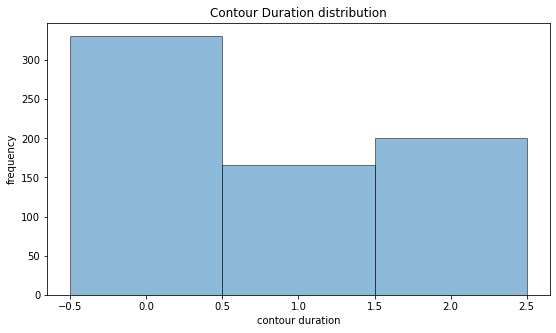

In [620]:
plt.figure(figsize=[9,5])
bins = range(0,4)

y = df_train['ContourGroup']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('contour duration')
plt.ylabel('frequency')
plt.title('Contour Duration distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [521]:
'''### SMOTE to over sample the training data
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()'''

"### SMOTE to over sample the training data\nfrom imblearn.over_sampling import SMOTE\nfrom collections import Counter\nfrom matplotlib import pyplot\n\noversample = SMOTE()\nX, y = oversample.fit_resample(X_train, y_train)\n# summarize distribution\ncounter = Counter(y)\nfor k,v in counter.items():\n    per = v / len(y) * 100\n    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))\n# plot the distribution\npyplot.bar(counter.keys(), counter.values())\npyplot.show()"

In [ ]:
X.shape


In [ ]:
y.shape

In [ ]:
'''
# use some features
X_names = ['TxFracs', 'TltDose', 'Categ_Standard 3','Categ_Urgent 2','Site_CNS', 'Site_GASTROINTESTINAL(GI)',
           'Site_BREAST','Site_ENT (HEAD & NECK)','Site_GENITOURINARY(GU)','Site_SARCOMA','Site_LUNG','Site_GYNAE']
X_train = df_train[X_names].values
y_train = df_train["ContourGroup"].values
X_test = df_test[X_names].values
y_test = df_test["ContourGroup"].values
'''

#### Decision Tree

In [697]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#mdl_dt = tree.DecisionTreeClassifier(max_depth=6)
#mdl_dt = mdl_dt.fit(X, y)

param_grid = {'max_depth': np.arange(3, 20),
              'max_features': np.arange(3,20),
              'min_samples_split': np.arange(2,10)
                  }
GS = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid) #class_weight={1:1/360, 2:1/130, 3:1/130}),
GS.fit(X_train, y_train)
GS.best_params_


{'max_depth': 7, 'max_features': 16, 'min_samples_split': 2}

In [698]:
X_test = df_test.drop("ContourGroup", axis=1).values
y_test = df_test["ContourGroup"].values

In [699]:
from sklearn.metrics import confusion_matrix, classification_report
dtree_model = DecisionTreeClassifier(max_depth=GS.best_params_['max_depth'], 
                                     max_features=GS.best_params_['max_features'],
                                    min_samples_split=GS.best_params_['min_samples_split']).fit(X_train, y_train)
y_test_pred = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)


In [700]:
print(cm)
print(classification_report(y_test, y_test_pred))


[[118   3  13]
 [ 18   8  47]
 [ 21   7  65]]
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       134
         1.0       0.44      0.11      0.18        73
         2.0       0.52      0.70      0.60        93

    accuracy                           0.64       300
   macro avg       0.57      0.56      0.53       300
weighted avg       0.61      0.64      0.59       300



In [701]:
dtree_model.score(X_train, y_train) # mean accuracy

0.7431850789096126

In [702]:
dtree_model.score(X_test, y_test)
# accuracy_score(y_test, y_test_pred)

0.6366666666666667

In [705]:
df_train.head()

,TltDose,TxFracs,Site_BREAST,Site_CNS,Site_ENDOCRINE,Site_ENT (HEAD & NECK),Site_EYE,Site_GASTROINTESTINAL(GI),Site_GENITOURINARY(GU),Site_GYNAE,...,Site_LUNG,Site_LYMPHOMA,Site_PAEDIATRIC,Site_SARCOMA,Site_SKIN,Site_UNKNOWN,Categ_Emergency 1,Categ_Standard 3,Categ_Urgent 2,ContourGroup
20521,5000.0,25.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2.0
6796,6000.0,8.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1.0
6309,800.0,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.0
55285,5000.0,25.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2.0
26027,2400.0,2.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0.0


In [ ]:
fn = df_train.drop("ContourGroup", axis=1).columns
cn=['fast','medium','slow']
fig = plt.figure(figsize=(50,20), dpi=400)
_ = tree.plot_tree(dtree_model, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)

#### other classifiers

In [ ]:
'''
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

print(accuracy)
print(cm)
print(classification_report(y_test, svm_predictions))
'''

In [533]:
'''# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_train, y_train)
print("Training accuracy:" , accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)'''

Training accuracy: 0.703012912482066


In [538]:
'''test_score = knn.score(X_test, y_test)
print("testing accuracy:" , test_score)'''

testing accuracy: 0.63


In [539]:
'''print(cm)
print(classification_report(y_test, knn_predictions))'''

[[114  16   9]
 [ 16  30  27]
 [ 15  28  45]]
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       139
         1.0       0.41      0.41      0.41        73
         2.0       0.56      0.51      0.53        88

    accuracy                           0.63       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.63      0.63      0.63       300



In [530]:
'''# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)'''

0.5033333333333333


#### random forest

In [621]:
### Random Forest
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_rf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(X_train,y_train)

y_pred = clf_rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6933333333333334


In [629]:
target_y

'TimeBtw_Sim_BkTx'

In [635]:
df_test_copy[df_test_copy[target_y]<0]=0

<ipython-input-635-71766997b0e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_copy[df_test_copy[target_y]<0]=0
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [640]:
df_test_copy[['TimeBtw_Sim_BkTx','ContourGroup']].head()

,TimeBtw_Sim_BkTx,ContourGroup
51341,4,1.0
49381,6,2.0
17131,0,0.0
47725,5,2.0
52336,1,1.0


In [641]:
df_test_copy[df_test_copy['ContourGroup']==0]['TimeBtw_Sim_BkTx'].median()

0.0

In [642]:
df_test_copy[df_test_copy['ContourGroup']==1]['TimeBtw_Sim_BkTx'].median()

2.0

In [643]:
df_test_copy[df_test_copy['ContourGroup']==2]['TimeBtw_Sim_BkTx'].median()

7.0

In [627]:
y_test

array([1., 2., 0., 2., 1., 0., 1., 1., 2., 1., 1., 0., 0., 2., 2., 1., 2.,
       1., 1., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 2., 0., 0., 0., 2., 1., 2., 0., 2., 2., 1., 2., 0., 0.,
       1., 0., 0., 1., 2., 2., 0., 0., 0., 0., 2., 2., 0., 2., 2., 0., 2.,
       2., 1., 2., 0., 2., 1., 2., 2., 2., 1., 2., 0., 2., 0., 2., 0., 0.,
       0., 1., 0., 0., 1., 2., 0., 0., 2., 1., 1., 1., 1., 0., 1., 0., 0.,
       2., 0., 2., 2., 0., 2., 0., 1., 1., 2., 0., 0., 0., 1., 2., 2., 0.,
       2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2.,
       2., 2., 1., 2., 2., 0., 2., 0., 1., 0., 2., 0., 2., 0., 0., 0., 0.,
       0., 0., 2., 1., 1., 0., 1., 0., 2., 0., 2., 2., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 2., 1., 0., 0., 2., 0., 2., 2., 2., 0., 2., 2.,
       0., 0., 1., 2., 2., 1., 0., 2., 0., 1., 0., 1., 2., 0., 2., 1., 0.,
       0., 0., 2., 1., 2., 0., 0., 2., 1., 0., 0., 1., 0., 1., 1., 2., 0.,
       0., 1., 0., 0., 1.

In [628]:
y_test_pred

array([1., 1., 1., 2., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 2., 1., 2., 0., 2., 0., 1., 1., 2., 1., 0., 1., 2.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 2., 1., 0., 1., 0., 0.,
       0., 1., 2., 2., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 2., 1.,
       2., 1., 2., 0., 0., 1., 0., 1., 0., 0., 0., 1., 2., 0., 1., 2., 0.,
       1., 2., 1., 2., 0., 0., 0., 0., 2., 0., 2., 1., 1., 1., 0., 2., 0.,
       1., 1., 0., 1., 0., 0., 0., 2., 1., 2., 1., 0., 0., 2., 2., 0., 0.,
       1., 1., 0., 0., 0., 2., 0., 1., 1., 1., 1., 0., 1., 2., 1., 2., 2.,
       1., 2., 1., 0., 2., 1., 0., 0., 0., 2., 2., 0., 1., 0., 0., 0., 1.,
       1., 0., 2., 2., 0., 0., 0., 2., 2., 2., 1., 0., 2., 0., 0., 0., 1.,
       0., 0., 0., 0., 2., 2., 2., 2., 0., 2., 1., 1., 0., 0., 0., 1., 1.,
       2., 0., 0., 2., 0., 0., 2., 1., 0., 1., 0., 1., 0., 1., 2., 0., 0.,
       1., 0., 1., 2., 0., 0., 0., 0., 1., 0., 0., 0., 2., 1., 1., 1., 0.,
       2., 0., 0., 0., 0.

In [646]:
y_pred_days = []
for i in y_test_pred:
    if i == 0:
        y_pred_days.append(0)
    if i == 1:
        y_pred_days.append(2)
        
    if i==2:
        y_pred_days.append(7)
        

In [692]:
df_out = pd.DataFrame(y_pred_days,columns=['pred'])
df_out['test']=y_test_days
df_out.head()

,pred,test
0,2,4
1,2,6
2,2,0
3,7,5
4,0,1


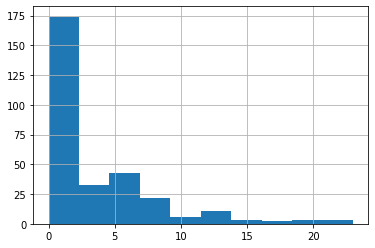

In [668]:
y_test_days = df_test_copy[target_y].values
df_test_copy[target_y].hist()

In [650]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_days, df_test_copy[target_y].values)
print(mse)

28.616666666666667


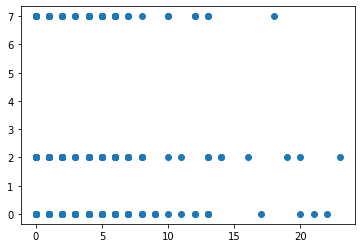

In [687]:
x=range(0, len(y_pred_days))
y=y_test_days
y2=y_pred_days
plt.scatter(y,y2)
#plt.scatter(x, y2)

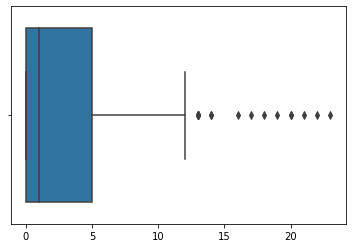

In [673]:
import seaborn as sns
sns.boxplot(x=y_test_days)

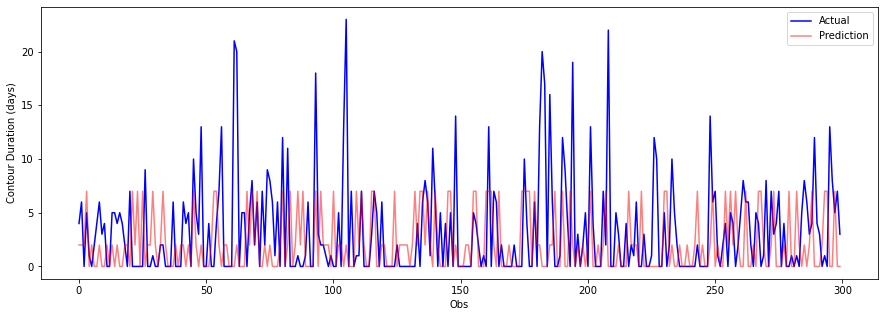

In [693]:
# Plot the y_test and the prediction (y_pred)
fig = plt.figure(figsize=(15, 5))
plt.plot(np.arange(0,len(y_test),1), y_test_days, 'b-', markersize=10, label='Actual')
plt.plot(np.arange(0,len(y_test),1), y_pred_days, 'r-', label='Prediction', alpha = 0.5)
plt.xlabel('Obs')
plt.ylabel('Contour Duration (days)')
#plt.ylim(-10, 20)
plt.legend(loc='upper right');

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

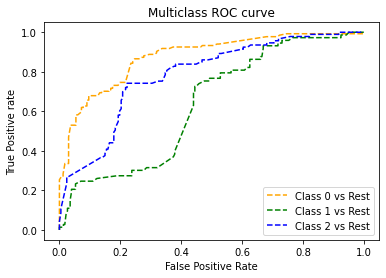

In [696]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
param_grid = {'max_depth': np.arange(3, 10),
              'max_features': np.arange(3,10)
              #'min_samples_split': np.arange(2,10)
                  }
GS = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid) #class_weight={1:1/360, 2:1/130, 3:1/130}),
GS.fit(X_train, y_train)
GS.best_params_

In [548]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [549]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [551]:
# evaluate random search
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

'''Model Performance
Average Error: 3.9199 degrees.
Accuracy = 93.36%.'''



Model Performance
Average Error: 0.3633 degrees.
Accuracy = nan%.


<ipython-input-551-25f4092ced27>:5: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
<ipython-input-551-25f4092ced27>:5: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


'Model Performance\nAverage Error: 3.9199 degrees.\nAccuracy = 93.36%.'

In [556]:
base_model.score(X_test, y_test)

0.6833333333333333

In [558]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=60, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=600)

In [555]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.3700 degrees.
Accuracy = nan%.
Improvement of nan%.


<ipython-input-551-25f4092ced27>:5: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
<ipython-input-551-25f4092ced27>:5: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [557]:
rf_random.score(X_test, y_test)

0.68

In [568]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [10, 12, 15],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [569]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Model Performance
Average Error: 0.3967 degrees.
Accuracy = nan%.
Improvement of nan%.


<ipython-input-551-25f4092ced27>:5: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
<ipython-input-551-25f4092ced27>:5: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [570]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [571]:
grid_search.score(X_test, y_test)

0.6733333333333333

In [574]:
y_rf_pred=grid_search.predict(X_test)
cm_rf = confusion_matrix(y_test, y_rf_pred)

In [576]:
print(cm_rf)
print(classification_report(y_test, y_rf_pred))

[[125  10   4]
 [ 24  19  30]
 [ 17  13  58]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       139
         1.0       0.45      0.26      0.33        73
         2.0       0.63      0.66      0.64        88

    accuracy                           0.67       300
   macro avg       0.61      0.61      0.60       300
weighted avg       0.64      0.67      0.65       300



In [584]:
df_test

,TltDose,TxFracs,ContourGroup,Site_BREAST,Site_CNS,Site_ENDOCRINE,Site_ENT (HEAD & NECK),Site_EYE,Site_GASTROINTESTINAL(GI),Site_GENITOURINARY(GU),...,Site_LEUKEMIA,Site_LUNG,Site_LYMPHOMA,Site_PAEDIATRIC,Site_SARCOMA,Site_SKIN,Site_UNKNOWN,Categ_Emergency 1,Categ_Standard 3,Categ_Urgent 2
38437,3000.0,4.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
52385,5000.0,25.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
17544,6000.0,30.0,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
26482,5000.0,25.0,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
16102,800.0,1.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14243,800.0,1.0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
51380,1800.0,6.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7690,3000.0,5.0,2.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
52411,3000.0,10.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [583]:
y_test

array([0., 0., 2., 1., 0., 1., 2., 0., 2., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 2., 0., 2., 1., 1., 0., 1., 0., 0., 0., 2., 2., 1., 0., 2.,
       1., 0., 0., 0., 0., 0., 2., 2., 0., 1., 1., 1., 1., 0., 2., 0., 0.,
       0., 0., 2., 2., 2., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 2., 2.,
       1., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 1., 2., 0.,
       2., 2., 1., 2., 0., 0., 0., 1., 1., 0., 2., 1., 1., 1., 0., 2., 2.,
       0., 1., 0., 1., 0., 0., 0., 2., 2., 2., 1., 2., 0., 1., 2., 1., 0.,
       1., 2., 0., 0., 0., 2., 0., 2., 2., 2., 1., 2., 1., 1., 2., 0., 0.,
       1., 1., 2., 0., 1., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 1., 0.,
       2., 0., 2., 1., 2., 0., 0., 2., 2., 1., 2., 0., 2., 1., 0., 0., 1.,
       0., 0., 2., 0., 2., 2., 1., 0., 0., 2., 1., 1., 0., 2., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 2., 0., 1., 0., 2., 0., 0., 2., 0., 2.,
       2., 0., 2., 1., 0., 0., 1., 0., 2., 0., 0., 2., 1., 2., 2., 1., 0.,
       1., 0., 0., 0., 0.

In [582]:
y_rf_pred

array([0., 2., 2., 2., 0., 2., 0., 0., 2., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 2., 0., 2., 0., 2., 0., 2., 1., 2., 2., 0., 1., 2.,
       0., 0., 0., 0., 1., 0., 1., 2., 0., 1., 0., 2., 2., 0., 1., 0., 0.,
       0., 1., 2., 2., 2., 0., 1., 2., 0., 0., 0., 1., 0., 0., 0., 2., 1.,
       2., 1., 2., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 0., 0., 2., 0., 2., 2., 2., 1., 0., 2., 0.,
       1., 2., 0., 1., 0., 0., 0., 0., 1., 2., 1., 0., 0., 2., 2., 0., 0.,
       2., 1., 0., 0., 0., 2., 0., 2., 0., 1., 1., 0., 1., 2., 2., 0., 1.,
       0., 0., 2., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 1.,
       2., 0., 2., 2., 0., 0., 0., 2., 2., 2., 2., 0., 2., 0., 0., 0., 1.,
       0., 0., 0., 0., 2., 2., 2., 0., 0., 2., 1., 1., 0., 2., 0., 1., 1.,
       2., 0., 0., 2., 0., 0., 2., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0.,
       2., 0., 1., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2., 2., 1., 0.,
       2., 0., 0., 0., 0.

#### Planning wait

In [579]:
preTxDur.columns

Index(['MRN', 'CreatedDate', 'SiteGroup', 'Diagnosis', 'Category_x',
       'PlanCreateDate', 'Team', 'GTV/CTVPromtDate', 'GTV/CTVCompleteDate',
       'ReviewDatePlaner', 'Location_x', 'FinalPlanPromtDate',
       'FinalPlanCompleteDate', 'PlanReviewRequestDate',
       'PlanProgressReviewDate', 'eBookingReviDate', 'SimApptDt',
       'SimApptCreatedDt', 'SimLocation', 'CTWait', 'TxStartDt',
       'TxApptCreatedDt', 'Sitegroup_y', 'TltDose', 'TxFracs', 'TxUnit',
       'Intent', 'TotalWaitTime', 'ContourDur', 'TimeBtw_Sim_ContourCompl',
       'TimeBtw_Sim_BkTx', 'Tx-TxBook', 'PlanDur', 'ContourWait',
       'TxApptBook-Sim', 'z_score_contour'],
      dtype='object')

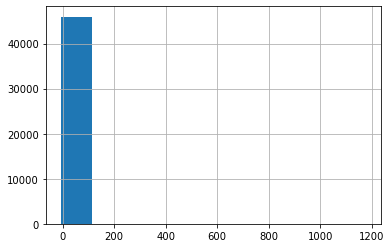

In [581]:
#remove outliers
preTxDur[preTxDur['Tx-TxBook']>-20]['Tx-TxBook'].hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[preTxDur['PlanningWait']>-20].PlanningWait
y = df_exceed[df_exceed['PlanningWait']>-20].PlanningWait
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Planning wait time frm contouring')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Planning time

In [ ]:
preTxDur[(preTxDur['PlanDur']>-20)&(preTxDur['PlanDur']<50)].PlanDur.hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[(preTxDur['PlanDur']>-20)&(preTxDur['PlanDur']<20)].PlanDur
y = df_exceed[(df_exceed['PlanDur']>-20)&(df_exceed['PlanDur']<20)].PlanDur
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Planning Durations')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
y = df_exceed[(df_exceed['PlanDur']>-20)&(df_exceed['PlanDur']<20)].PlanDur
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')
plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Planning Durations')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
preTxDur[(preTxDur['PlanFinished_TxCreated']>-20)&(preTxDur['PlanFinished_TxCreated']<50)].PlanFinished_TxCreated.hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(-10,10)

x = preTxDur[(preTxDur['PlanFinished_TxCreated']>-20)&(preTxDur['PlanFinished_TxCreated']<50)].PlanFinished_TxCreated
y = df_exceed[(df_exceed['PlanFinished_TxCreated']>-20)&(df_exceed['PlanFinished_TxCreated']<50)].PlanFinished_TxCreated
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Planning finished to treatment created')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Seems the treatments are often pre-booked

In [ ]:
preTxDur[(preTxDur['WT Tx Frm Created']>-20)&(preTxDur['WT Tx Frm Created']<50)]['WT Tx Frm Created'].hist()


### Total pre-treatment time

In [ ]:
preTxDur['Tx-Sim']=pd.to_datetime(preTxDur['TxStartDt']).dt.date-pd.to_datetime(preTxDur['SimApptDt']).dt.date
preTxDur['Tx-Sim']=preTxDur['Tx-Sim'].dt.days
df_exceed['Tx-Sim']=pd.to_datetime(df_exceed['TxStartDt']).dt.date-pd.to_datetime(df_exceed['SimApptDt']).dt.date
df_exceed['Tx-Sim']=df_exceed['Tx-Sim'].dt.days

In [ ]:
preTxDur['Tx-Sim'].hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[(preTxDur['Tx-Sim']>-20)&(preTxDur['Tx-Sim']<50)]['Tx-Sim']
y = df_exceed[(df_exceed['Tx-Sim']>-20)&(df_exceed['Tx-Sim']<50)]['Tx-Sim']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number')
plt.title('Time between Tx and Sim')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[(preTxDur['Tx-TxBook']>-20)&(preTxDur['Tx-TxBook']<50)]['Tx-TxBook']
y = df_exceed[(df_exceed['Tx-TxBook']>-20)&(df_exceed['Tx-TxBook']<50)]['Tx-TxBook']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number')
plt.title('Time between Tx and TxBook')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
preTxDur[(preTxDur['prebook frm CT']>-20)&(preTxDur['prebook frm CT']<50)]['prebook frm CT'].hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(-10,17)

x = preTxDur[(preTxDur['prebook frm CT']>-20)&(preTxDur['prebook frm CT']<50)]['prebook frm CT']
y = df_exceed[(df_exceed['prebook frm CT']>-20)&(df_exceed['prebook frm CT']<50)]['prebook frm CT']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('preBook Frm CTAppt')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
preTxDur['PlanFinish_TxStart'] = preTxDur['TxStartDt'] - preTxDur['FinalPlanCompleteDate']
preTxDur['PlanFinish_TxStart']=preTxDur['PlanFinish_TxStart'].dt.days
df_exceed['PlanFinish_TxStart'] = df_exceed['TxStartDt'] - df_exceed['FinalPlanCompleteDate']
df_exceed['PlanFinish_TxStart']=df_exceed['PlanFinish_TxStart'].dt.days
preTxDur[(preTxDur['PlanFinish_TxStart']>-50)&(preTxDur['PlanFinish_TxStart']<50)]['PlanFinish_TxStart'].hist();

In [ ]:
plt.figure(figsize=[9,5])
bins = range(-10,17)

x = preTxDur[(preTxDur['PlanFinish_TxStart']>-100)&(preTxDur['PlanFinish_TxStart']<100)]['PlanFinish_TxStart']
y = df_exceed[(df_exceed['PlanFinish_TxStart']>-100)&(df_exceed['PlanFinish_TxStart']<100)]['PlanFinish_TxStart']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number')
plt.title('Time btw PlanComplete and TxStart')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show();

In [ ]:
# box plots of pretreatment duration of all patients based on intent
data_list=[]
intents=preTxDur['Intent'].unique()
for i in intents:
    data=preTxDur[preTxDur['Intent']==i]['Tx-Sim']
    data_list.append(data)

fig = plt.figure(figsize =(7,5)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(data_list,labels=intents) 
plt.axhline(y=14, color='r', linestyle='-',lw=1)  
ax.set_title('pre-Tx durations for diff intents')
# show plot 
plt.show()